In [2]:
import os

In [3]:
%pwd

'd:\\ML_Projects\\Resume Project\\Project_6_insurance_claim_prediction\\reasearch'

In [4]:
os.chdir("../")

In [5]:
%pwd

'd:\\ML_Projects\\Resume Project\\Project_6_insurance_claim_prediction'

In [6]:
# Entity
from dataclasses import dataclass
from pathlib import Path

@dataclass(frozen=True)
class ModelTrainingConfig:
    root_dir: Path
    train_data_path: Path
    test_data_path: Path
    model_name: str
    max_depth: int # params
    min_samples_split: int
    min_samples_leaf: int
    target_column: str # Schema.yaml




In [7]:
# prepare confuguration manager class
from src.mlproject.constants import *
from src.mlproject.utils.common import read_yaml,create_directories

In [8]:
class ConfigurationManager:
    def __init__(self,
                 config_filepath = CONFIG_FILE_PATH,
                 params_filepath = PARAMS_FILE_PATH,
                 schema_filepath = SCHEMA_FILE_PATH):
        
        self.config = read_yaml(config_filepath)
        self.params = read_yaml(params_filepath)
        self.schema = read_yaml(schema_filepath)

        create_directories([self.config.artifacts_root])


    def get_model_trainer_config(self) -> ModelTrainingConfig:
        config =  self.config.model_trainer
        params = self.params.DecisionTree
        schema = self.schema.TARGET_COLUMN

        create_directories([config.root_dir])

        model_trainer_config = ModelTrainingConfig(
            root_dir = config.root_dir,
            train_data_path = config.train_data_path,
            test_data_path =  config.test_data_path,
            model_name = config.model_name,
            max_depth = params.max_depth, # params.yaml
            min_samples_split = params.min_samples_split,
            min_samples_leaf= params.min_samples_leaf,
            target_column = schema.name # Schema.yaml
        )

        return model_trainer_config

In [9]:
import os
import pandas as pd
from src.mlproject.logging import logger
from sklearn.tree import DecisionTreeRegressor
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
class ModelTrainer:
    def __init__(self,config: ModelTrainingConfig):
        self.config = config

    def train(self):
        train_data = pd.read_csv(self.config.train_data_path)
        test_data = pd.read_csv(self.config.test_data_path)

        
        train_X = train_data.drop([self.config.target_column],axis=1)
        test_X = test_data.drop([self.config.target_column],axis=1)
        train_y = train_data[[self.config.target_column]]
        test_y = test_data[[self.config.target_column]]
        # print(train_X)
        print("y_test",test_y)

        DT = DecisionTreeRegressor(max_depth=self.config.max_depth,
                                   min_samples_split=self.config.min_samples_split,
                                   min_samples_leaf=self.config.min_samples_leaf,
                                   random_state=42)
        DT.fit(train_X,train_y)
        y_pred_test =DT.predict(test_X)
        y_pred_train =DT.predict(train_X)

        # plt.(train_y,y_test)
        plt.scatter(x=test_y,y= y_pred_test)
        plt.plot(test_y,test_y)
        plt.title("Test Data")
        print("y_pred",y_pred_test)

        plt.scatter(x=train_y,y= y_pred_train)
        plt.plot(train_y,train_y)
        plt.title("Train Data")
                

        # joblib.dump(lr, os.path.join(self.config.root_dir,self.config.model_name))

[2025-04-11 14:11:02,011: INFO: common: yaml file: config\config.yaml loaded successfully]
[2025-04-11 14:11:02,014: INFO: common: yaml file: params.yaml loaded successfully]
[2025-04-11 14:11:02,018: INFO: common: yaml file: schema.yaml loaded successfully]
[2025-04-11 14:11:02,020: INFO: common: Created directory at: artifacts]
[2025-04-11 14:11:02,022: INFO: common: Created directory at: artifacts/model_trainer]
y_test          charges
0    11945.13270
1    27808.72510
2    14692.66935
3    23045.56616
4    14451.83515
..           ...
688  11482.63485
689   2913.56900
690   1622.18850
691   1877.92940
692   2207.69745

[693 rows x 1 columns]
y_pred [11945.1327     27808.7251     14692.66935    23045.56616
 14449.8544      5478.0368      7196.867       6289.7549
 14001.2867      3766.8838      4687.797      10096.97
  2250.8352      7147.4728     29330.98315    14254.6082
  8798.593      14394.5579     27941.28758     1532.4697
 39611.7577      1241.565       1984.4533      1906.358

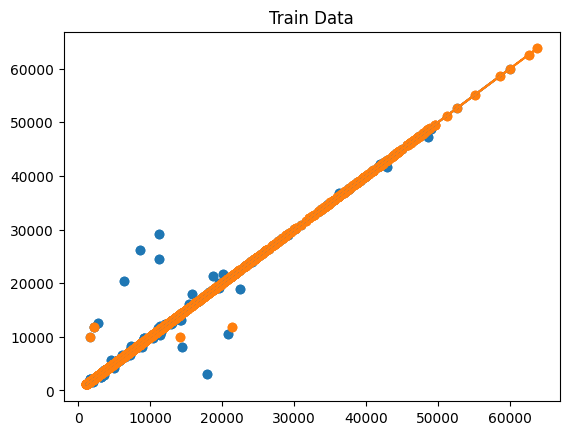

In [15]:
# Pipeline
try:
    config = ConfigurationManager()
    model_trainer_config = config.get_model_trainer_config()
    model_trainer_config = ModelTrainer(config=model_trainer_config)
    model_trainer_config.train()
except Exception as e:
    raise e